In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv(r'C:\Users\ANUBHAV CHAUHAN\Desktop\Python Assignment\Python Assignment 1\playstore-analysis (2) (1).csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Tasks
### 1.	Data clean up – Missing value treatment
#### a.	Drop records where rating is missing since rating is our target/study variable

In [7]:
# Solution 
# Q)1.a 

df.dropna(how='any', subset=['Rating'], inplace=True)
df['Rating'].count()

9367

In [9]:
df['Rating'].isnull().sum()

0

### b.	Check the null values for the Android Ver column. 
#### i.	Are all 3 records having the same problem?


In [10]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


## Yes, all the 3 records have same problem that is all are Nan

### b.ii.	Drop the 3rd record i.e. record for “Life Made WIFI …”

In [11]:
df.drop([10472], inplace = True)

In [12]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


### b.iii.	Replace remaining missing values with the mode

In [13]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

### c.	Current ver – replace with most common value

In [14]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)

## 2.	Data clean up – correcting the data types

### a.	Which all variables need to be brought to numeric types?


In [15]:
df.dtypes
# Reviews and Installs need to be brought to numeric types because as we can see number of "Reviews" and "Installs"
# are of Object datatype, which must be in numeric types.

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### b.	Price variable – remove (Dollar) sign and convert to floatn.

In [16]:
price = []
for i in df['Price']:
    if i[0] == '$':
        price.append(i[1:])
    else:
        price.append(i)

In [17]:
df['Price'].drop(labels= df[df['Price']== 'Everyone'].index, inplace= True)
df["Price"] = price
df['Price'] = df['Price'].astype('float')

In [18]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### c.	Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [19]:
install = []
for i in df['Installs']:
    install.append(i.replace(',','').replace('+','').strip())
    
df['Installs'] = install
df['Installs'] = df['Installs'].astype(int)

### d.	Convert all other identified columns to numeric

In [20]:
df['Reviews'] = df['Reviews'].astype(int)

## 3.	Sanity checks – check for the following and handle accordingly
###  a.	Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
### i.	Are there any such records? Drop if so.


In [ ]:
df.loc[df['Rating'] < 1]&df.loc[df['Rating'] > 5]

#### There are no such records with ratings less than 1 and greater than 5.

### b.	Reviews should not be more than installs as only those who installed can review the app.
### i.	Are there any such records? Drop if so.


In [21]:

df.loc[df['Reviews'] > df['Installs']]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


#### Yes, there are 7 such records.

In [22]:
temp = df[df['Reviews'] > df['Installs']].index
temp
df.drop(labels=temp, inplace = True)

In [23]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## 4.	Identify and handle outliers – 
### a.	Price column
### i.	Make suitable plot to identify outliers in price 

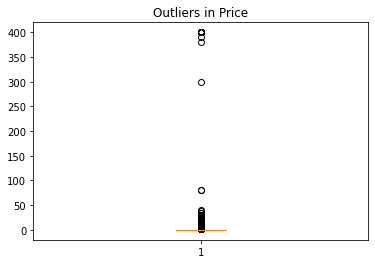

In [25]:
plt.boxplot(df['Price'])
plt.title('Outliers in Price', fontsize = 12)
plt.show()

### ii. Do you expect apps on the play store to cost 200? Check out these cases

In [26]:
df.loc[df['Price'] >= 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


#### Yes, there are apps on playstore which cost to or more than 200 dollars.

### iii.	After dropping the useless records, make the suitable plot again to identify outliers

In [29]:
tem = df[df['Price'] >= 30].index
df.drop(labels=tem, inplace=True)

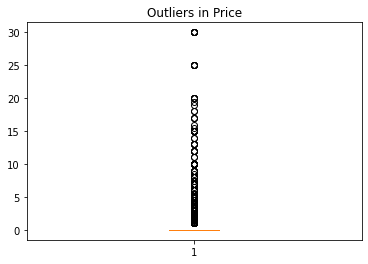

In [32]:
plt.boxplot(df['Price'])
plt.title('Outliers in Price', fontsize=12)
plt.show()

### iv.	Limit data to records with price < (Dollar)30

In [31]:
count = df.loc[df['Price'] > 30].index
count.value_counts().sum()

0

## b.	Reviews column
### i.	Make suitable plot


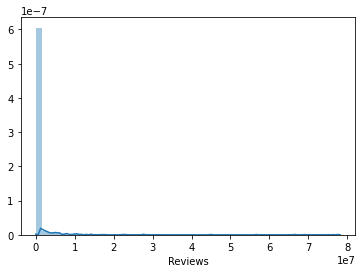

In [216]:
sns.distplot(df['Reviews'])
plt.show()

### ii.	Limit data to apps with < 1 Million reviews

In [221]:
rvgt_1m = df[df['Reviews']> 1000000].index
df.drop(labels=rvgt_1m, inplace= True)
print(rvgt_1m.value_counts().sum(), 'Columns Dropped')

704 Columns Dropped


## c.	Installs
### i.	What is the 95th percentile of the installs?


In [225]:
Percentile = np.percentile(df['Installs'],95)
print(Percentile, 'Is the 95th percentile of the Installs')

10000000.0 Is the 95th percentile of the Installs


### ii.	Drop records having a value more than the 95th percentile

In [232]:
dr_95 = df[df['Installs'] > Percentile].index
df.drop(labels=dr_95, inplace=True)
print(dr_95.value_counts().sum(),'are the no. of dropped records more than 95th percentile')




199 are the no. of dropped records more than 95th percentile


## Data analysis to answer business questions
## 5.	What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?


### a.	How do you explain this?

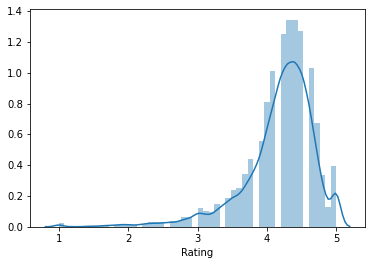

In [233]:
sns.distplot(df['Rating'])
plt.show()

In [235]:
df['Rating'].skew()
print('The skewness of this distribution is',df['Rating'].skew())

The skewness of this distribution is -1.7396480352327652


In [240]:
df['Rating'].median()
df['Rating'].mean()
print('Median = {} of the this distribution is greater than mean = {} of this distribution'.format(df['Rating'].median(),df['Rating'].mean()))

Median = 4.3 of the this distribution is greater than mean = 4.170186849574275 of this distribution


### b.	What is the implication of this on your analysis?

In [244]:
print(df['Rating'].mode())

0    4.3
dtype: float64


#### Since mode >= median > mode, the distribution of the 'Rating' is  negatively skewed. Therefore distribution of rating is more skewed towards lower values.

## 6.	What are the top Content Rating values?
### a.	Are there any values with very few records?


In [251]:
df['Content Rating'].value_counts()

Everyone           6802
Teen                901
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

### Adults only 18+ and Unrated have values with very few records therefore we drop them.

### b.	If yes, drop those as they won’t help in the analysis

In [274]:
# dropping adult only 18+
dr_cr = df[df['Content Rating'] == 'Adults only 18+'].index
df.drop(labels=dr_cr, inplace=True)

In [278]:
# dropping unrated
dr_ur = df[df["Content Rating"] == 'Unrated'].index
df.drop(labels=dr_ur, inplace=True)


In [279]:
# checking whether the values with few records are dropped or not.
df['Content Rating'].value_counts()

Everyone        6802
Teen             901
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

## 7.	Effect of size on rating
### a.	Make a joinplot to understand the effect of size on rating


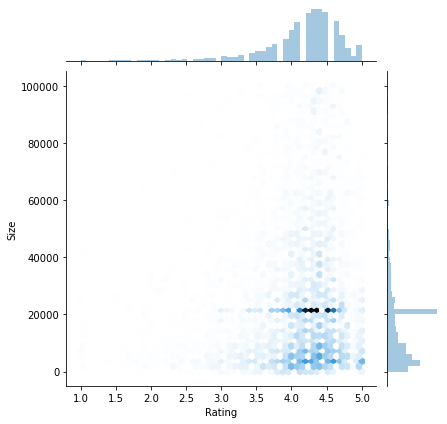

In [288]:
sns.jointplot(x='Rating',y='Size', data=df, kind='hex')
plt.show()

### b.	Do you see any patterns?

#### Yes, patterns can be observed between size and rating, and there is correlation between size and ratings.

###  c.	How do you explain the pattern?

#### Generally, on increasing rating, size of the app also increases. Thus we can conclude that their is a positive correlation between Size and Rating.

## 8.	Effect of price on rating
### a.	Make a jointplot (with regression line)


In [296]:
import warnings
warnings.filterwarnings('ignore')

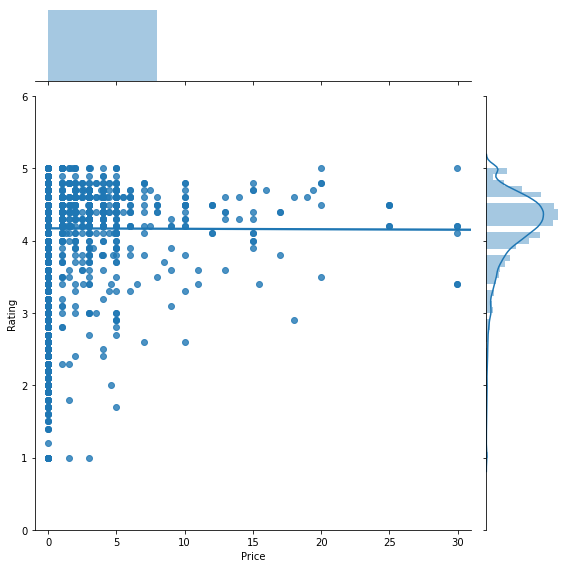

In [342]:
sns.jointplot(x= 'Price', y= 'Rating', data = df, height = 8, ratio= 5 ,space = 0.2, xlim=(-1,31), ylim=(0,6),  kind = 'reg')
plt.show()

### b.	What pattern do you see?

#### Generally on increasing the price rating remains almost constant, that is greater than 4.

### c.	How do you explain the pattern?

In [327]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158846,0.058043,0.118928,-0.019779
Reviews,0.158846,1.000000,0.204631,0.736179,-0.026393
Size,0.058043,0.204631,1.000000,0.190795,-0.024084
Installs,0.118928,0.736179,0.190795,1.000000,-0.037616
Price,-0.019779,-0.026393,-0.024084,-0.037616,1.000000


#### As on increasing the price rating remains almost constant i.e. greater than 4. And from above correlation chart we can easily see the correlation of -0.019779 between price and rating. 
#### Therefore we can conclude that there is  a very weak positive correlation between Price and rating

### d.	Replot the data, this time with only records with price > 0 

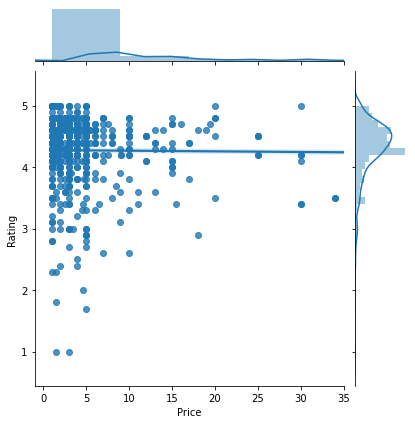

In [347]:
dx = df.loc[df.Price>0]
sns.jointplot(x = 'Price', y = 'Rating', data = dx, height=6, xlim= (-1,35), kind = 'reg')
plt.show()


### e.	Does the pattern change?

In [349]:
dx.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.099374,0.116271,0.066298,-0.112040
Reviews,0.099374,1.000000,0.162752,0.787835,-0.041793
Size,0.116271,0.162752,1.000000,0.118098,-0.077499
Installs,0.066298,0.787835,0.118098,1.000000,-0.029645
Price,-0.112040,-0.041793,-0.077499,-0.029645,1.000000


#### yes, there is a slight difference in pattern when limiting the price greater than zero, weakly negative correlation can be seen between Rating and Price.

### f.	What is your overall inference on the effect of price on the rating

#### By my observation, there is not so much effect of price on the rating, because as the price increases there is an constant rating above 4. Therefore I conclude that there is a very slight effect of price on rating.

## 9.	Look at all the numeric interactions together – 
### a.	Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'


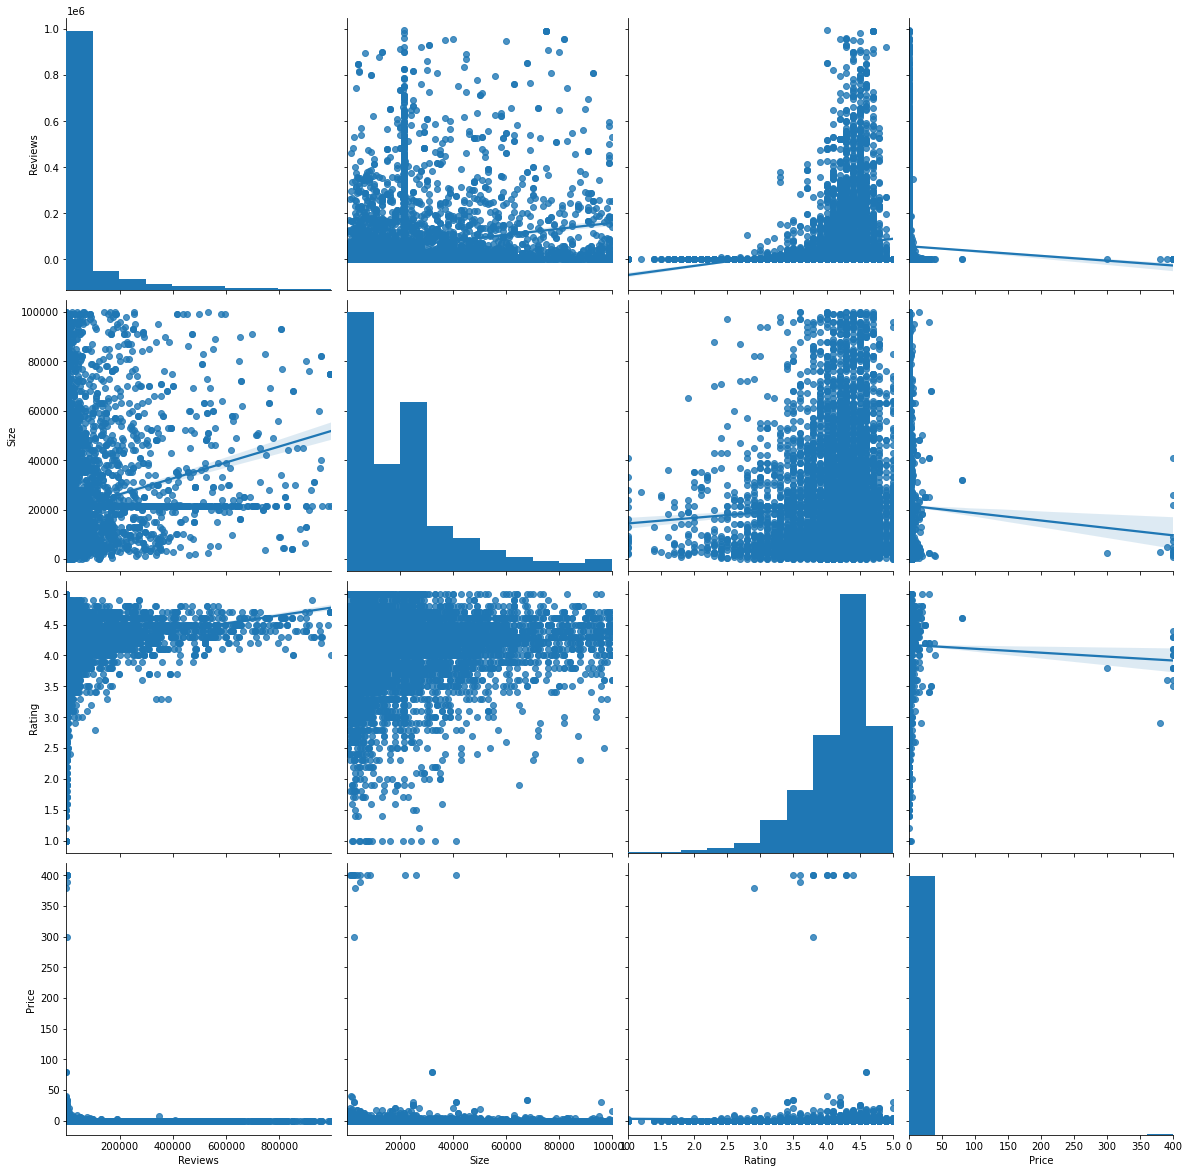

In [375]:
sns.pairplot(df, vars=['Reviews','Size','Rating','Price'], size = 4, kind= 'reg')
plt.show()

## 10.	Rating vs. content rating
### a.	Make a bar plot displaying the rating for each content rating


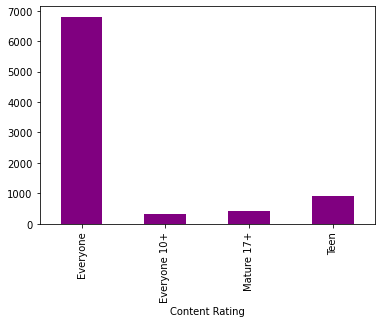

In [384]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color='purple')

### b.	Which metric would you use? Mean? Median? Some other quantile?

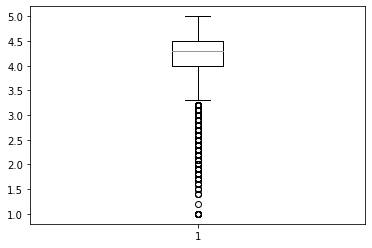

In [386]:
plt.boxplot(df['Rating']);

#### As there are outliers, we must use median. Because mean is very sensitive to outliers and in case of outliers median is the best measure of central tendency.

### c.	Choose the right metric and plot

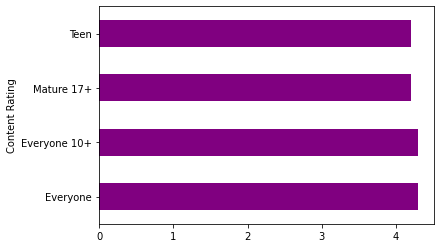

In [398]:
df.groupby(['Content Rating'])['Rating'].median().plot.barh(color = 'purple')

### 11.	Content rating vs. size vs. rating – 3 variables at a time
#### a.	Create 5 buckets (20% records in each) based on Size


In [399]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.144862,4.247561,4.010582,4.182016
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.166736,4.263636,4.190476,4.237383
60k-80k,4.237879,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


### b.	By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [400]:
temp= pd.pivot_table(df, values='Rating', index = 'Bucket Size', columns='Content Rating', aggfunc= lambda x:np.quantile(x,0.2))
temp

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,3.90,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


### c.	Make a heatmap of this
#### i.	Annotated


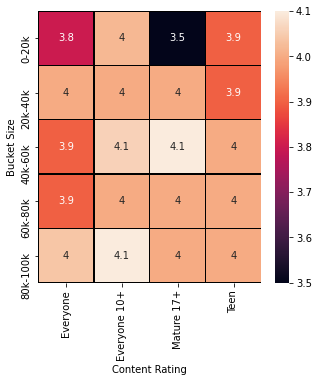

In [414]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(temp, annot=True, linewidths=0.3, linecolor= 'black',ax=ax)

#### ii.	Greens color map

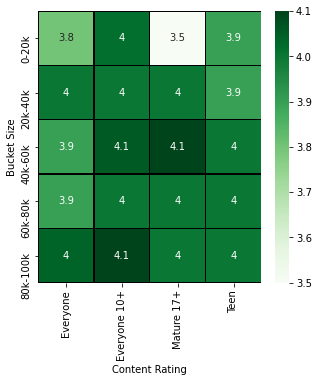

In [415]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(temp, annot=True, linewidths=0.3, cmap='Greens', linecolor= 'black',ax=ax)

### d.	What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

#### By my observation and analysis it is not true that lighter apps are preferred in all categories because ratings for lighter apps are not that high as of ratings of heavier apps.
#### we can also see above that ratings for 40k-60k and 80k-100k size apps are highest, so I conclude that heavier apps are preferred in all categories.

# Thank You!!!